# Proyecto Minería de Datos

In [1]:
import sys
sys.path.append("C:/Users/faria/PycharmProjects/pythonProject/venv/Lib/site-packages")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clasificación

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
family = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/family.csv")
commun = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/communication.csv")
games = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/games.csv")
magazi = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/magazines.csv")
photo = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/photo.csv")
produc = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/productivity.csv")
social = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/social.csv")
tools = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/tools.csv")
video = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/video.csv")
travel = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/travel.csv")

In [4]:
cat_dt = [family, commun, games, magazi, photo, produc, social, tools, video, travel]

In [5]:
from sklearn.metrics import precision_score

def precision0micro(model, X, y):
    y_pred = model.predict(X)
    return precision_score(y, y_pred, zero_division=0, average='micro')

def precision0macro(model, X, y):
    y_pred = model.predict(X)
    return precision_score(y, y_pred, zero_division=0, average='macro')

def mean(a):
    n = len(a)
    t = sum(a)
    return t/n

def crossVal(X, y, model, k):
    print("Exactitud: ", mean(cross_val_score(model, X, y, cv=k, scoring="accuracy")))
    print("Precisión (micro): ", mean(cross_val_score(model, X, y, cv=k, scoring=precision0micro)))
    print("Precisión (macro): ", mean(cross_val_score(model, X, y, cv=k, scoring=precision0macro)))
    print("Recall (micro): ", mean(cross_val_score(model, X, y, cv=k, scoring="recall_micro")))
    print("Recall (macro): ", mean(cross_val_score(model, X, y, cv=k, scoring="recall_macro")))
    print("F1 (micro): ", mean(cross_val_score(model, X, y, cv=k, scoring="f1_micro")))
    print("F1 (macro): ", mean(cross_val_score(model, X, y, cv=k, scoring="f1_macro")))

### Descargas

In [27]:
cat_dt_d = []
label_cat_d = []
label_cat_d2 = []
for dt in cat_dt:
    cat_dt_d.append(dt[["Rating", "Reviews", "Size", "Type", "Content.Rating"]])
    label_cat_d2.append(dt[["Installs"]])
    label_cat_d.append(dt[["Installs_Q"]])

#### Árbol de Decisión

In [28]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_d[i], label_cat_d[i], DecisionTreeClassifier(), 5)

Categoría 0 ----------------------
Exactitud:  0.7516549435965495
Precisión (micro):  0.7531094890510949
Precisión (macro):  0.747091586194842
Recall (micro):  0.747291307232913
Recall (macro):  0.7444926777179199
F1 (micro):  0.7450988719309886
F1 (macro):  0.7400750955691873
Categoría 1 ----------------------
Exactitud:  0.7677177177177177
Precisión (micro):  0.7678678678678679
Precisión (macro):  0.6684731855262042
Recall (micro):  0.7839339339339338
Recall (macro):  0.7162698412698413
F1 (micro):  0.7786786786786786
F1 (macro):  0.6732424077285757
Categoría 2 ----------------------
Exactitud:  0.757137674587339
Precisión (micro):  0.7571376745873389
Precisión (macro):  0.7430033321167897
Recall (micro):  0.7665880645746418
Recall (macro):  0.7213935757137728
F1 (micro):  0.7490567748957011
F1 (macro):  0.7326975836815619
Categoría 3 ----------------------
Exactitud:  0.7071428571428572
Precisión (micro):  0.7214285714285713
Precisión (macro):  0.6171230158730159
Recall (micro):  0.

#### KNN

In [18]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_d[i], np.ravel(label_cat_d[i]), KNeighborsClassifier(n_neighbors=10), 5) # k=10 es arbitrario

Categoría 0 ----------------------
Exactitud:  0.7450537491705375
Precisión (micro):  0.7450537491705375
Precisión (macro):  0.7404599545414899
Recall (micro):  0.7450537491705375
Recall (macro):  0.7370325683885035
F1 (micro):  0.7450537491705373
F1 (macro):  0.73542529054517
Categoría 1 ----------------------
Exactitud:  0.8177177177177178
Precisión (micro):  0.8177177177177178
Precisión (macro):  0.8131782392444157
Recall (micro):  0.8177177177177178
Recall (macro):  0.7553174603174602
F1 (micro):  0.8177177177177178
F1 (macro):  0.753317566217131
Categoría 2 ----------------------
Exactitud:  0.7773625974968257
Precisión (micro):  0.7773625974968257
Precisión (macro):  0.7634797837886091
Recall (micro):  0.7773625974968257
Recall (macro):  0.7593922218552761
F1 (micro):  0.7773625974968257
F1 (macro):  0.7585336110557404
Categoría 3 ----------------------
Exactitud:  0.8142857142857143
Precisión (micro):  0.8142857142857143
Precisión (macro):  0.6804527417027417
Recall (micro):  0.

#### Naive Bayes

In [19]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_d[i], np.ravel(label_cat_d[i]), GaussianNB(), 5)

Categoría 0 ----------------------
Exactitud:  0.6190948905109488
Precisión (micro):  0.6190948905109488
Precisión (macro):  0.6301542768060091
Recall (micro):  0.6190948905109488
Recall (macro):  0.624154090124063
F1 (micro):  0.6190948905109488
F1 (macro):  0.6091471993790167
Categoría 1 ----------------------
Exactitud:  0.8123123123123124
Precisión (micro):  0.8123123123123124
Precisión (macro):  0.7782980499892265
Recall (micro):  0.8123123123123124
Recall (macro):  0.7721428571428571
F1 (micro):  0.8123123123123124
F1 (macro):  0.7552342559139692
Categoría 2 ----------------------
Exactitud:  0.6829131144567386
Precisión (micro):  0.6829131144567386
Precisión (macro):  0.6725156784572919
Recall (micro):  0.6829131144567386
Recall (macro):  0.6689963015283213
F1 (micro):  0.6829131144567386
F1 (macro):  0.6591051202786151
Categoría 3 ----------------------
Exactitud:  0.6714285714285715
Precisión (micro):  0.6714285714285715
Precisión (macro):  0.6444246031746032
Recall (micro):  

#### Support Vector Machine

In [20]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_d[i], np.ravel(label_cat_d[i]), SVC(kernel='sigmoid'), 5) # no usar 'linear'

Categoría 0 ----------------------
Exactitud:  0.46103782349037825
Precisión (micro):  0.46103782349037825
Precisión (macro):  0.29875249050454183
Recall (micro):  0.46103782349037825
Recall (macro):  0.43311439518336065
F1 (micro):  0.46103782349037825
F1 (macro):  0.321554024798872
Categoría 1 ----------------------
Exactitud:  0.5309309309309309
Precisión (micro):  0.5309309309309309
Precisión (macro):  0.34080851943755175
Recall (micro):  0.5309309309309309
Recall (macro):  0.4123809523809524
F1 (micro):  0.5309309309309309
F1 (macro):  0.32769089749721025
Categoría 2 ----------------------
Exactitud:  0.48989660801741336
Precisión (micro):  0.48989660801741336
Precisión (macro):  0.32027732223050887
Recall (micro):  0.48989660801741336
Recall (macro):  0.4337945109078114
F1 (micro):  0.48989660801741336
F1 (macro):  0.3391516525026588
Categoría 3 ----------------------
Exactitud:  0.5857142857142856
Precisión (micro):  0.5857142857142856
Precisión (macro):  0.36188349331827596
Rec

### Descargas (de pago)

In [26]:
cat_dt_dp = []
label_cat_dp = []
for dt in cat_dt:
    cat_dt_dp.append(dt[dt.Type==1][["Rating", "Reviews", "Size", "Content.Rating", "Price"]])
    label_cat_dp.append(dt[dt.Type==1][["Installs_Q"]])

#### Árbol de Decisión

In [27]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_dp[i]) > 75:
        crossVal(cat_dt_dp[i], label_cat_dp[i], DecisionTreeClassifier(), 5)
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.8064039408866994
Precisión (micro):  0.8064039408866994
Precisión (macro):  0.7811327561327561
Recall (micro):  0.7926108374384236
Recall (macro):  0.7664357864357866
F1 (micro):  0.7788177339901479
F1 (macro):  0.7612926248158447
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


#### KNN

In [29]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_dp[i]) > 75:
        crossVal(cat_dt_dp[i], np.ravel(label_cat_dp[i]), KNeighborsClassifier(n_neighbors=10), 5) # k=10 es arbitrario
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.8199507389162562
Precisión (micro):  0.8199507389162562
Precisión (macro):  0.7136767399267399
Recall (micro):  0.8199507389162562
Recall (macro):  0.7304545454545455
F1 (micro):  0.8199507389162562
F1 (macro):  0.7144514066496164
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


#### Naive Bayes

In [30]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_dp[i]) > 75:
        crossVal(cat_dt_dp[i], np.ravel(label_cat_dp[i]), GaussianNB(), 5)
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.7285714285714284
Precisión (micro):  0.7285714285714284
Precisión (macro):  0.693212481962482
Recall (micro):  0.7285714285714284
Recall (macro):  0.73495670995671
F1 (micro):  0.7285714285714285
F1 (macro):  0.6846039984043417
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


#### Support Vector Machine

In [31]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_dp[i]) > 75:
        crossVal(cat_dt_dp[i], np.ravel(label_cat_dp[i]), SVC(kernel='sigmoid'), 5) # no usar 'linear'
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.47955665024630545
Precisión (micro):  0.47955665024630545
Precisión (macro):  0.2588965997770346
Recall (micro):  0.47955665024630545
Recall (macro):  0.3547619047619047
F1 (micro):  0.47955665024630545
F1 (macro):  0.2762682239152827
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


### Rating

In [30]:
cat_dt_r = []
label_cat_r = []
label_cat_r2 = []
for dt in cat_dt:
    cat_dt_r.append(dt[["Installs", "Reviews", "Size", "Type", "Content.Rating"]])
    label_cat_r2.append(dt[["Rating"]])
    label_cat_r.append(dt[["Rating_Q"]])

#### Árbol de Decisión

In [21]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_r[i], label_cat_r[i], DecisionTreeClassifier(), 5)

Categoría 0 ----------------------
Exactitud:  0.30226675514266754
Precisión (micro):  0.30953948241539486
Precisión (macro):  0.28897115313941385
Recall (micro):  0.30299137358991374
Recall (macro):  0.2851365029433464
F1 (micro):  0.30082282680822825
F1 (macro):  0.292947085395778
Categoría 1 ----------------------
Exactitud:  0.3475975975975976
Precisión (micro):  0.38078078078078076
Precisión (macro):  0.3650329082682024
Recall (micro):  0.3642642642642643
Recall (macro):  0.4051334776334777
F1 (micro):  0.34774774774774775
F1 (macro):  0.3648800640364107
Categoría 2 ----------------------
Exactitud:  0.3117177580264829
Precisión (micro):  0.3009341556321422
Precisión (macro):  0.30298585600299405
Recall (micro):  0.3076818429167422
Recall (macro):  0.310236782012834
F1 (micro):  0.3063304915653909
F1 (macro):  0.2994410074091046
Categoría 3 ----------------------
Exactitud:  0.2785714285714286
Precisión (micro):  0.2857142857142857
Precisión (macro):  0.26617063492063486
Recall (m

#### KNN

In [22]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_r[i], np.ravel(label_cat_r[i]), KNeighborsClassifier(n_neighbors=10), 5) # k=10 es arbitrario

Categoría 0 ----------------------
Exactitud:  0.3525202388852024
Precisión (micro):  0.3525202388852024
Precisión (macro):  0.33268390328909
Recall (micro):  0.3525202388852024
Recall (macro):  0.33235093011407085
F1 (micro):  0.3525202388852024
F1 (macro):  0.3260282836154067
Categoría 1 ----------------------
Exactitud:  0.44174174174174174
Precisión (micro):  0.44174174174174174
Precisión (macro):  0.4045713706583272
Recall (micro):  0.44174174174174174
Recall (macro):  0.4081150793650794
F1 (micro):  0.44174174174174174
F1 (macro):  0.37213293363760896
Categoría 2 ----------------------
Exactitud:  0.3549428623254126
Precisión (micro):  0.3549428623254126
Precisión (macro):  0.3615944675135213
Recall (micro):  0.3549428623254126
Recall (macro):  0.35345118933056296
F1 (micro):  0.3549428623254126
F1 (macro):  0.35164983337493483
Categoría 3 ----------------------
Exactitud:  0.36428571428571427
Precisión (micro):  0.36428571428571427
Precisión (macro):  0.357748348143085
Recall (m

#### Naive Bayes

In [31]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_r[i], np.ravel(label_cat_r[i]), GaussianNB(), 5)

Categoría 0 ----------------------
Exactitud:  0.2432594558725946
Precisión (micro):  0.2432594558725946
Precisión (macro):  0.3160883192575952
Recall (micro):  0.2432594558725946
Recall (macro):  0.2774616626779846
F1 (micro):  0.2432594558725946
F1 (macro):  0.1681317521223382
Categoría 1 ----------------------
Exactitud:  0.33153153153153153
Precisión (micro):  0.33153153153153153
Precisión (macro):  0.30655232056590753
Recall (micro):  0.33153153153153153
Recall (macro):  0.3348322510822511
F1 (micro):  0.33153153153153153
F1 (macro):  0.2618542669686534
Categoría 2 ----------------------
Exactitud:  0.3023399238164339
Precisión (micro):  0.3023399238164339
Precisión (macro):  0.4070196757198315
Recall (micro):  0.3023399238164339
Recall (macro):  0.3393348994260656
F1 (micro):  0.3023399238164339
F1 (macro):  0.25464959094836015
Categoría 3 ----------------------
Exactitud:  0.3071428571428571
Precisión (micro):  0.3071428571428571
Precisión (macro):  0.31011904761904757
Recall (m

#### Support Vector Machine

In [24]:
for i in range(10):
    print("Categoría", i, "----------------------")
    crossVal(cat_dt_r[i], np.ravel(label_cat_r[i]), SVC(), 5) # no usar 'linear'

Categoría 0 ----------------------
Exactitud:  0.3335474452554744
Precisión (micro):  0.3335474452554744
Precisión (macro):  0.1807018697674122
Recall (micro):  0.3335474452554744
Recall (macro):  0.2734352294878611
F1 (micro):  0.3335474452554744
F1 (macro):  0.20316665859010605
Categoría 1 ----------------------
Exactitud:  0.35375375375375373
Precisión (micro):  0.35375375375375373
Precisión (macro):  0.19704545454545452
Recall (micro):  0.35375375375375373
Recall (macro):  0.3254545454545455
F1 (micro):  0.35375375375375373
F1 (macro):  0.22310655031243268
Categoría 2 ----------------------
Exactitud:  0.3117358969707963
Precisión (micro):  0.3117358969707963
Precisión (macro):  0.28268628518628514
Recall (micro):  0.3117358969707963
Recall (macro):  0.29494209795274456
F1 (micro):  0.3117358969707963
F1 (macro):  0.2548846771835168
Categoría 3 ----------------------
Exactitud:  0.2785714285714286
Precisión (micro):  0.2785714285714286
Precisión (macro):  0.1615859407003908
Recall 

### Rating (de pago)

In [32]:
cat_dt_rp = []
label_cat_rp = []
for dt in cat_dt:
    cat_dt_rp.append(dt[dt.Type==1][["Installs", "Reviews", "Size", "Content.Rating", "Price"]])
    label_cat_rp.append(dt[dt.Type==1][["Rating_Q"]])

#### Árbol de Decisión

In [34]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_rp[i]) > 75:
        crossVal(cat_dt_rp[i], label_cat_rp[i], DecisionTreeClassifier(), 5)
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.3748768472906404
Precisión (micro):  0.3955665024630542
Precisión (macro):  0.36387445887445885
Recall (micro):  0.38128078817733996
Recall (macro):  0.3315476190476191
F1 (micro):  0.36773399014778324
F1 (macro):  0.3447776288039446
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


#### KNN

In [35]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_rp[i]) > 75:
        crossVal(cat_dt_rp[i], np.ravel(label_cat_rp[i]), KNeighborsClassifier(n_neighbors=10), 5) # k=10 es arbitrario
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.42241379310344823
Precisión (micro):  0.42241379310344823
Precisión (macro):  0.4505323144777479
Recall (micro):  0.42241379310344823
Recall (macro):  0.36071428571428565
F1 (micro):  0.42241379310344823
F1 (macro):  0.361391663336046
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


#### Naaive Bayes

In [36]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_rp[i]) > 75:
        crossVal(cat_dt_rp[i], np.ravel(label_cat_rp[i]), GaussianNB(), 5)
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.2573891625615764
Precisión (micro):  0.2573891625615764
Precisión (macro):  0.21986772486772485
Recall (micro):  0.2573891625615764
Recall (macro):  0.30178571428571427
F1 (micro):  0.2573891625615764
F1 (macro):  0.18422734886112385
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


#### Support Vector Machine

In [37]:
for i in range(10):
    print("Categoría", i, "----------------------")
    if len(cat_dt_rp[i]) > 75:
        crossVal(cat_dt_rp[i], np.ravel(label_cat_rp[i]), SVC(kernel='sigmoid'), 5) # no usar 'linear'
    else:
        print("Not enough data")

Categoría 0 ----------------------
Exactitud:  0.4027093596059113
Precisión (micro):  0.4027093596059113
Precisión (macro):  0.19457949457949458
Recall (micro):  0.4027093596059113
Recall (macro):  0.2547619047619048
F1 (micro):  0.4027093596059113
F1 (macro):  0.18278443520703586
Categoría 1 ----------------------
Not enough data
Categoría 2 ----------------------
Not enough data
Categoría 3 ----------------------
Not enough data
Categoría 4 ----------------------
Not enough data
Categoría 5 ----------------------
Not enough data
Categoría 6 ----------------------
Not enough data
Categoría 7 ----------------------
Not enough data
Categoría 8 ----------------------
Not enough data
Categoría 9 ----------------------
Not enough data


### Análisis de Texto

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [14]:
reviews = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/UserReview.csv")

In [34]:
hashVectorizer = HashingVectorizer(stop_words=None, alternate_sign=False)
text_dt = hashVectorizer.fit_transform(reviews["Translated_Review"])

svd = TruncatedSVD(100) # arbitrario
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
text_dt = lsa.fit_transform(text_dt)

In [35]:
text_labels_sp = np.ravel(reviews["sentiment_polarity"])
text_labels_ss = np.ravel(reviews["sentiment_subjectivity"])
text_labels_sq = np.ravel(reviews["spelling_quality"])

In [27]:
def crossValPlot(X, y, model, k):
    exactitud = mean(cross_val_score(model, X, y, cv=k, scoring="accuracy"))
    precision_micro = mean(cross_val_score(model, X, y, cv=k, scoring=precision0micro))
    precision_macro = mean(cross_val_score(model, X, y, cv=k, scoring=precision0macro))
    recall_micro = mean(cross_val_score(model, X, y, cv=k, scoring="recall_micro"))
    recall_macro = mean(cross_val_score(model, X, y, cv=k, scoring="recall_macro"))
    f1_micro = mean(cross_val_score(model, X, y, cv=k, scoring="f1_micro"))
    f1_macro = mean(cross_val_score(model, X, y, cv=k, scoring="f1_macro"))
    mtr = ["exactitud","precision_micro","precision_macro","recall_micro","recall_macro","f1_micro","f1_macro"]
    val = [exactitud,precision_micro,precision_macro,recall_micro,recall_macro,f1_micro,f1_macro]
    plt.barh(mtr,val)
    plt.show()

#### Árbol de Decisión

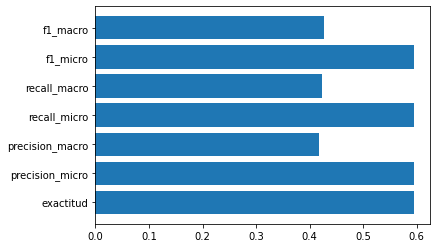

In [38]:
# Sentiment Polarity
crossValPlot(text_dt, text_labels_sp, DecisionTreeClassifier(), 5)

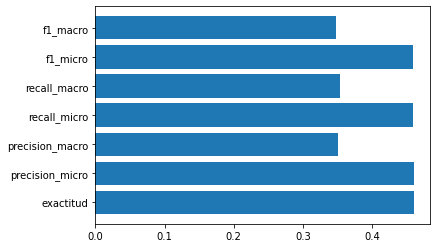

In [39]:
# Sentiment Subjectivity
crossValPlot(text_dt, text_labels_ss, DecisionTreeClassifier(), 5)

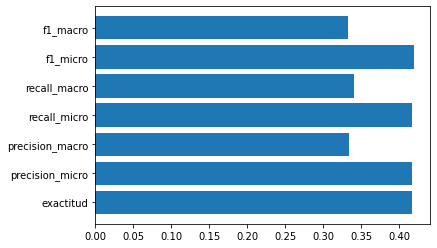

In [40]:
# Spelling Quality
crossValPlot(text_dt, text_labels_sq, DecisionTreeClassifier(), 5)

#### KNN

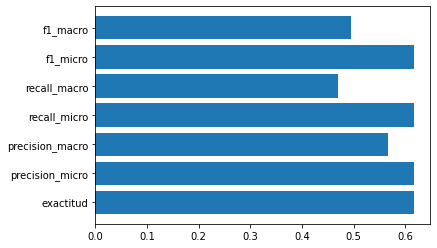

In [41]:
# Sentiment Polarity
crossValPlot(text_dt, text_labels_sp, KNeighborsClassifier(n_neighbors=10), 5)

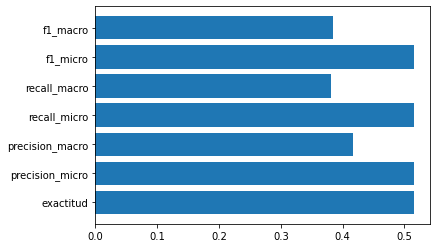

In [42]:
# Sentiment Subjectivity
crossValPlot(text_dt, text_labels_ss, KNeighborsClassifier(n_neighbors=10), 5)

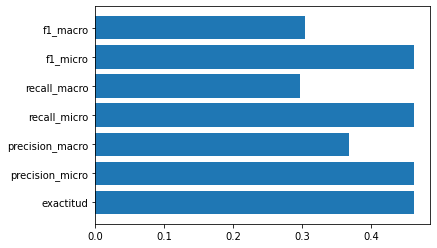

In [43]:
# Spelling Quality
crossValPlot(text_dt, text_labels_sq, KNeighborsClassifier(n_neighbors=10), 5)

#### Naive Bayes

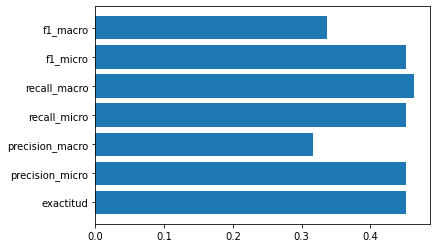

In [44]:
# Sentiment Polarity
crossValPlot(text_dt, text_labels_sp, GaussianNB(), 5)

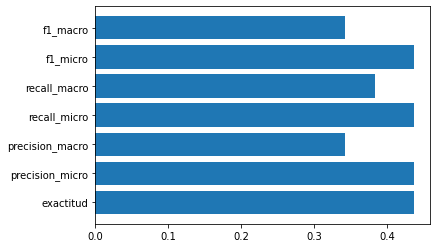

In [45]:
# Sentiment Subjectivity
crossValPlot(text_dt, text_labels_ss, GaussianNB(), 5)

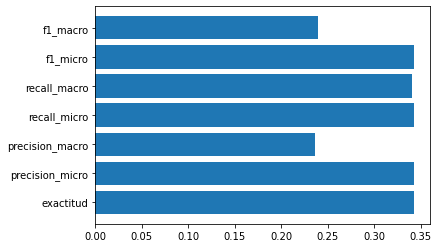

In [46]:
# Spelling Quality
crossValPlot(text_dt, text_labels_sq, GaussianNB(), 5)

#### Support Vector Machine

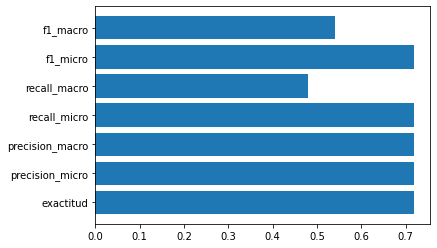

In [47]:
# Sentiment Polarity
crossValPlot(text_dt, text_labels_sp, SVC(), 5)

In [ ]:
# Sentiment Subjectivity
crossValPlot(text_dt, text_labels_ss, SVC(), 5)

In [ ]:
# Spelling Quality
crossValPlot(text_dt, text_labels_sp, SVC(), 5)

### Clasificación de Descargas según Reviews

In [3]:
clus_dt = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/DataPregunta2_1.csv")

X2 = clus_dt[["sentiment_polarity_score","SPQ1","SPQ3","ease_of_reading_score","ERQ1","ERQ3","sentiment_subjectivity_score","SSQ1","SSQ3",
       "spelling_quality_score","SQQ1","SQQ3","sentences_count","characters_count","count_words","spaces_count","alpha_numeric_count",
       "punctuations_count","noun_phase_count"]]

label_d = np.ravel(clus_dt["Installs_Q"])
label_r = np.ravel(clus_dt["Rating_Q"])

#### Árbol de Decisión

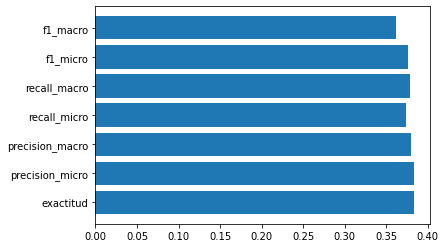

In [50]:
crossValPlot(X2, label_d, DecisionTreeClassifier(), 5)

#### KNN

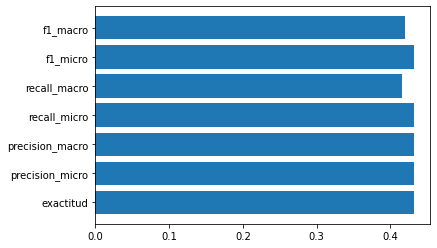

In [51]:
crossValPlot(X2, label_d, KNeighborsClassifier(n_neighbors=10), 5)

#### Naive Bayes

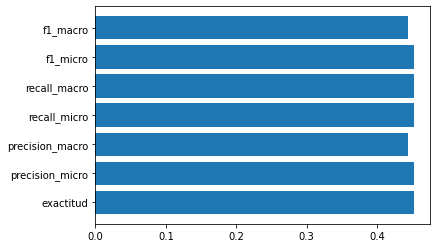

In [52]:
crossValPlot(X2, label_d, GaussianNB(), 5)

#### Support Vector Machine

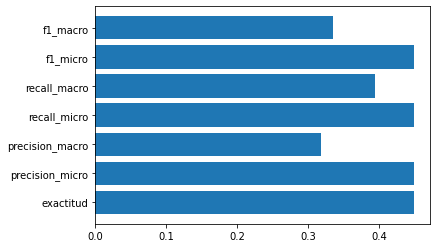

In [53]:
crossValPlot(X2, label_d, SVC(), 5)

### Clasificación de Rating según Reviews

#### Árbol de Decisión

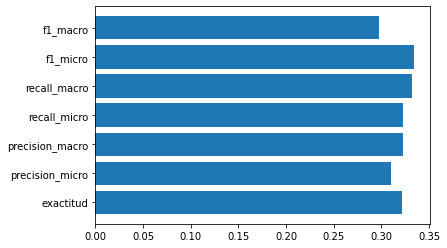

In [54]:
crossValPlot(X2, label_r, DecisionTreeClassifier(), 5)

#### KNN

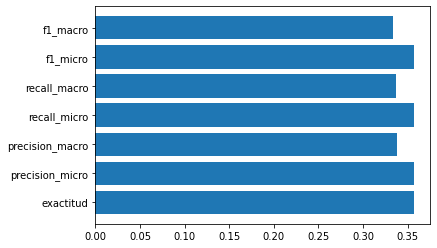

In [55]:
crossValPlot(X2, label_r, KNeighborsClassifier(n_neighbors=10), 5)

#### Naive Bayes

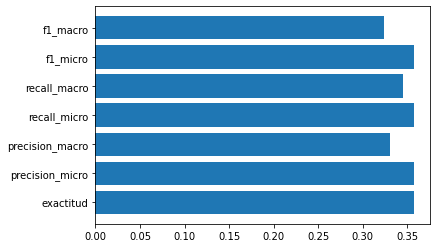

In [56]:
crossValPlot(X2, label_r, GaussianNB(), 5)

#### Support Vector Machine

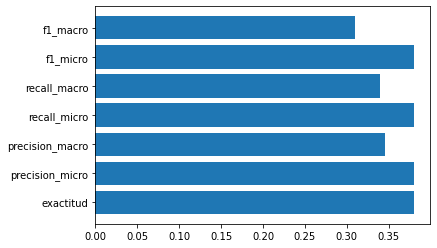

In [57]:
crossValPlot(X2, label_r, SVC(), 5)

## Clustering

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score

### K-Means

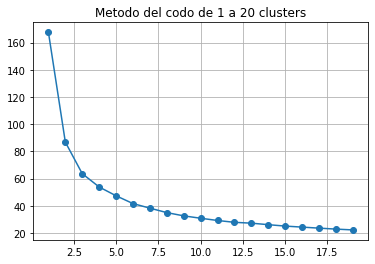

In [4]:
sse = []

clusters = list(range(1, 20))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X2)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters")
plt.grid(True)
plt.show()

In [5]:
kmeans4 = KMeans(n_clusters=4).fit(X2)
kmeans5 = KMeans(n_clusters=5).fit(X2)
sse4 = kmeans4.inertia_
sse5 = kmeans5.inertia_
for i in range(50):
    km4 = KMeans(n_clusters=4).fit(X2)
    km5 = KMeans(n_clusters=5).fit(X2)
    if sse4 > km4.inertia_:
        kmeans4 = km4
        sse4 = km4.inertia_
    if sse5 > km5.inertia_:
        kmeans5 = km5
        sse5 = km5.inertia_

In [6]:
from sklearn.metrics import silhouette_score

print("SSE K=4 :", kmeans4.inertia_)
print("SSE K=5 :", kmeans5.inertia_)
print("Silhouette K=4 :", silhouette_score(X2, kmeans4.labels_))
print("Silhouette K=5 :", silhouette_score(X2, kmeans5.labels_))

SSE K=4 : 53.85633375030004
SSE K=5 : 47.197896245237885
Silhouette K=4 : 0.29055131580962906
Silhouette K=5 : 0.26748087749550353


In [11]:
from sklearn.decomposition import PCA

red_X2= PCA(n_components=2, random_state=0).fit_transform(X2)

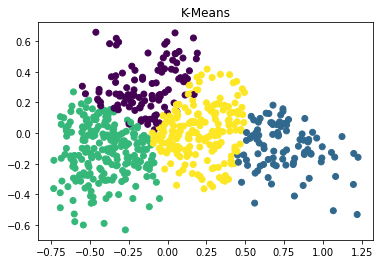

In [64]:
plt.scatter(red_X2[:, 0], red_X2[:, 1], c=kmeans4.labels_)
plt.title("K-Means K=4")
plt.show()

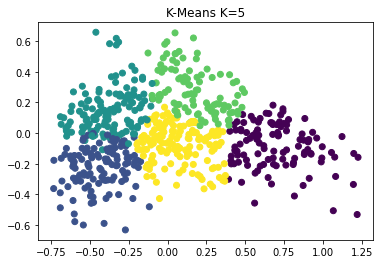

In [65]:
plt.scatter(red_X2[:, 0], red_X2[:, 1], c=kmeans5.labels_)
plt.title("K-Means K=5")
plt.show()

In [66]:
Y2_1 = X2.copy()
xcol = X2.columns
Y2_1["label"] = kmeans4.labels_
Y2_1[Y2_1.label == 0][xcol].describe()

,sentiment_polarity_score,SPQ1,SPQ3,ease_of_reading_score,ERQ1,ERQ3,sentiment_subjectivity_score,SSQ1,SSQ3,spelling_quality_score,SQQ1,SQQ3,sentences_count,characters_count,count_words,spaces_count,alpha_numeric_count,punctuations_count,noun_phase_count
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,0.093557,-0.072577,0.295727,0.852538,0.834928,0.876694,0.414763,0.132987,0.617347,0.875626,0.824252,0.987132,0.169660,0.203935,0.210082,0.149560,0.809267,0.040762,0.197470
std,0.101220,0.104981,0.146595,0.011809,0.012563,0.015628,0.056742,0.145207,0.070222,0.038017,0.055359,0.025480,0.076493,0.080977,0.081673,0.009988,0.014687,0.012638,0.076789
min,-0.142060,-0.460833,0.000000,0.811363,0.798214,0.842706,0.271669,0.000000,0.445833,0.721009,0.653846,0.888889,0.003623,0.000956,0.003540,0.123901,0.711828,0.010392,0.007239
25%,0.023328,-0.110000,0.197135,0.844489,0.825267,0.864014,0.368194,0.000000,0.577976,0.855079,0.800000,0.995313,0.113694,0.137760,0.150470,0.144402,0.804752,0.035183,0.142170
50%,0.094289,-0.011830,0.295258,0.852425,0.834760,0.874361,0.415811,0.068750,0.600000,0.881107,0.831386,1.000000,0.177106,0.217917,0.221277,0.147941,0.809766,0.039704,0.205617
75%,0.175417,0.000000,0.414583,0.861404,0.843772,0.887863,0.459953,0.255208,0.658266,0.901497,0.865933,1.000000,0.224012,0.262843,0.264168,0.154754,0.814768,0.044513,0.248898
max,0.278184,0.008333,0.575000,0.877567,0.860275,0.903669,0.555331,0.423810,0.868750,0.959457,0.961538,1.000000,0.344900,0.378103,0.395138,0.182603,0.863309,0.142652,0.370604


In [67]:
Y2_1[Y2_1.label == 1][xcol].describe()

,sentiment_polarity_score,SPQ1,SPQ3,ease_of_reading_score,ERQ1,ERQ3,sentiment_subjectivity_score,SSQ1,SSQ3,spelling_quality_score,SQQ1,SQQ3,sentences_count,characters_count,count_words,spaces_count,alpha_numeric_count,punctuations_count,noun_phase_count
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.102619,-0.024292,0.241791,0.844828,0.834300,0.857092,0.508191,0.417634,0.603318,0.904117,0.872687,0.942143,0.634321,0.658805,0.678112,0.155160,0.804414,0.040331,0.657859
std,0.089151,0.092815,0.094417,0.006187,0.007400,0.005714,0.036084,0.046559,0.042902,0.019908,0.026263,0.017949,0.114822,0.099168,0.103930,0.005307,0.006659,0.004601,0.105228
min,-0.042331,-0.230469,0.079196,0.831602,0.817589,0.846596,0.382123,0.293750,0.491837,0.837230,0.791299,0.880000,0.412185,0.503495,0.534376,0.143822,0.774686,0.020886,0.481829
25%,0.037878,-0.088702,0.166563,0.839781,0.829256,0.852516,0.488386,0.383369,0.575667,0.893311,0.857143,0.933333,0.569759,0.577868,0.601569,0.150697,0.799899,0.037772,0.589438
50%,0.081662,-0.039395,0.221111,0.843796,0.832815,0.858027,0.511256,0.424380,0.600000,0.905833,0.874780,0.944444,0.605958,0.638555,0.646612,0.154098,0.804422,0.040616,0.637849
75%,0.170738,0.026674,0.304531,0.850032,0.840491,0.860597,0.526391,0.450030,0.626830,0.918971,0.893047,0.955300,0.698602,0.716895,0.739299,0.159827,0.808544,0.042688,0.710772
max,0.325055,0.200033,0.468182,0.857489,0.850711,0.869219,0.591402,0.515783,0.722222,0.942277,0.921216,0.975000,1.000000,1.000000,1.000000,0.166883,0.820148,0.058114,1.000000


In [68]:
Y2_1[Y2_1.label == 2][xcol].describe()

,sentiment_polarity_score,SPQ1,SPQ3,ease_of_reading_score,ERQ1,ERQ3,sentiment_subjectivity_score,SSQ1,SSQ3,spelling_quality_score,SQQ1,SQQ3,sentences_count,characters_count,count_words,spaces_count,alpha_numeric_count,punctuations_count,noun_phase_count
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,2.240000e+02
mean,0.329172,0.081959,0.591180,0.855974,0.835669,0.885027,0.524180,0.325477,0.731298,0.885208,0.832039,0.995842,0.109820,0.129343,0.131546,0.142970,0.817798,0.038449,1.311989e-01
std,0.097005,0.120708,0.100760,0.012106,0.015146,0.016437,0.057059,0.149309,0.081368,0.038683,0.062298,0.016134,0.072244,0.077684,0.078031,0.010224,0.014196,0.008793,7.806307e-02
min,0.099120,-0.250000,0.345833,0.819555,0.774509,0.840282,0.347588,0.000000,0.598214,0.731668,0.666667,0.888889,0.000000,0.000000,0.000000,0.106481,0.772857,0.010401,-6.938894e-18
25%,0.264584,0.000000,0.504792,0.848917,0.824294,0.871300,0.486997,0.279687,0.672917,0.865786,0.800000,1.000000,0.044534,0.058069,0.062793,0.137345,0.808609,0.034471,6.557357e-02
50%,0.335546,0.000000,0.600000,0.855480,0.834758,0.886543,0.520864,0.357337,0.750000,0.890821,0.836046,1.000000,0.101008,0.123861,0.124805,0.144069,0.816013,0.038553,1.249385e-01
75%,0.403584,0.177289,0.683438,0.864886,0.846236,0.901386,0.563351,0.427746,0.772500,0.912721,0.875000,1.000000,0.154552,0.188660,0.190541,0.149269,0.824264,0.043494,1.905550e-01
max,0.565437,0.397222,0.910000,0.883846,0.871978,0.903669,0.692420,0.600000,1.000000,0.955761,1.000000,1.000000,0.340301,0.337442,0.332591,0.167979,0.861111,0.069541,3.371043e-01


In [69]:
Y2_1[Y2_1.label == 3][xcol].describe()

,sentiment_polarity_score,SPQ1,SPQ3,ease_of_reading_score,ERQ1,ERQ3,sentiment_subjectivity_score,SSQ1,SSQ3,spelling_quality_score,SQQ1,SQQ3,sentences_count,characters_count,count_words,spaces_count,alpha_numeric_count,punctuations_count,noun_phase_count
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.146988,-0.026857,0.332092,0.845778,0.831791,0.861116,0.494453,0.371352,0.633956,0.896494,0.856913,0.958109,0.342829,0.393844,0.403198,0.152768,0.807158,0.039886,0.393886
std,0.106484,0.105271,0.123837,0.007607,0.008988,0.008148,0.050358,0.076385,0.053275,0.027000,0.034986,0.030474,0.088051,0.077064,0.078675,0.006326,0.007248,0.005517,0.078518
min,-0.099251,-0.385714,0.047917,0.826542,0.805874,0.839933,0.367368,0.180000,0.475000,0.826344,0.756211,0.875203,0.128763,0.228173,0.250612,0.133849,0.784594,0.022294,0.242427
25%,0.071301,-0.077083,0.245691,0.840898,0.826769,0.855321,0.464122,0.326000,0.600000,0.875752,0.829545,0.939236,0.274004,0.331598,0.337613,0.148578,0.802329,0.036070,0.333778
50%,0.156799,0.000000,0.350000,0.845732,0.831936,0.860522,0.492744,0.374821,0.629487,0.900417,0.863245,0.956522,0.339817,0.389963,0.397558,0.152550,0.807321,0.039598,0.386038
75%,0.228086,0.002232,0.431250,0.851122,0.837998,0.867689,0.523120,0.419048,0.666667,0.917181,0.883036,0.984043,0.401638,0.459968,0.466225,0.156517,0.812061,0.043873,0.458225
max,0.386179,0.232000,0.604167,0.861963,0.851893,0.883682,0.672514,0.594444,0.793333,0.952594,0.923077,1.000000,0.552585,0.540266,0.566869,0.172627,0.827821,0.059921,0.564576


Se observa que k-means agrupa las aplicaciones únicamente según el largo medio de los comentarios.

In [14]:
def c_sim(X, model):
    Z = X.copy()
    Z["label"] = model.labels_
    labels = np.unique(model.labels_)
    cat = []
    gen = []
    con = []
    for i in labels:
        cval, ccounts = np.unique(Z[Z.label==i]["Category"], return_counts=True)
        gval, gcounts = np.unique(Z[Z.label==i]["Genres"], return_counts=True)
        rval, rcounts = np.unique(Z[Z.label==i]["Content.Rating"], return_counts=True)
        cat.append(dict(zip(ccounts,cval)))
        gen.append(dict(zip(gcounts,gval)))
        con.append(dict(zip(rcounts,rval))) # cambiar | puede haber solapamiento de llaves
    for i in labels:
        print("Cluster", i)
        print("categories:", len(cat[i])/33)
        keys = cat[i].keys()
        m = max(keys)
        print("top category:", cat[i][m], "|", m/sum(keys))
        print("genres:", len(gen[i])/63)
        keys = gen[i].keys()
        m = max(keys)
        print("top genre:", gen[i][m], "|", m/sum(keys))
        print("content ratings:", len(con[i])/5)
        keys = con[i].keys()
        m = max(keys)
        print("top content rating:", con[i][m], "|", m/sum(keys))
        print("---------------------------------------")

def meanRating(X, model):
    Z = X.copy()
    Z["label"] = model.labels_
    labels = np.unique(model.labels_)
    for i in labels:
        print("Cluster", i, "mean rating:", Z[Z.label==i]["Rating"].mean())

In [91]:
c_sim(clus_dt, kmeans4)

Cluster 0
categories: 0.3333333333333333
top category: 14 | 0.16666666666666666
genres: 0.13432835820895522
top genre: 70 | 0.2
content ratings: 0.8
top content rating: Everyone | 0.7909090909090909
---------------------------------------
Cluster 1
categories: 0.24242424242424243
top category: 14 | 0.5
genres: 0.1044776119402985
top genre: 59 | 0.25
content ratings: 0.6
top content rating: Everyone | 0.7209302325581395
---------------------------------------
Cluster 2
categories: 0.45454545454545453
top category: 23 | 0.1322314049586777
genres: 0.208955223880597
top genre: 79 | 0.14953271028037382
content ratings: 1.0
top content rating: Everyone | 0.8571428571428571
---------------------------------------
Cluster 3
categories: 0.42424242424242425
top category: 14 | 0.18018018018018017
genres: 0.19402985074626866
top genre: 61 | 0.14285714285714285
content ratings: 0.8
top content rating: Everyone | 0.7845303867403315
---------------------------------------


In [93]:
meanRating(clus_dt, kmeans4)

Cluster 0 mean rating: 4.115454545454546
Cluster 1 mean rating: 4.326086956521739
Cluster 2 mean rating: 4.34375
Cluster 3 mean rating: 4.270165745856353


In [94]:
c_sim(clus_dt, kmeans5)

Cluster 0
categories: 0.2727272727272727
top category: 14 | 0.45454545454545453
genres: 0.11940298507462686
top genre: 59 | 0.2222222222222222
content ratings: 0.6
top content rating: Everyone | 0.7475728155339806
---------------------------------------
Cluster 1
categories: 0.30303030303030304
top category: 30 | 0.18181818181818182
genres: 0.14925373134328357
top genre: 109 | 0.18181818181818182
content ratings: 1.0
top content rating: Everyone | 0.8166666666666667
---------------------------------------
Cluster 2
categories: 0.30303030303030304
top category: 11 | 0.23880597014925373
genres: 0.11940298507462686
top genre: 107 | 0.2631578947368421
content ratings: 0.8
top content rating: Everyone | 0.8686131386861314
---------------------------------------
Cluster 3
categories: 0.24242424242424243
top category: 14 | 0.41509433962264153
genres: 0.1044776119402985
top genre: 51 | 0.25806451612903225
content ratings: 0.8
top content rating: Everyone | 0.7272727272727273
------------------

In [95]:
meanRating(clus_dt, kmeans5)

Cluster 0 mean rating: 4.310909090909091
Cluster 1 mean rating: 4.365833333333333
Cluster 2 mean rating: 4.25109489051095
Cluster 3 mean rating: 4.0606060606060606
Cluster 4 mean rating: 4.355319148936171


In [8]:
from sklearn.metrics import mutual_info_score

print("Categories mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["Category"])))
print("Genres mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["Genres"])))
print("Content Rating mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["Content.Rating"])))
print("Rating mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["Rating_Q"])))
print("Installs mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["Installs_Q"])))
print("Sentiment polarity mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["sentiment_polarity"])))
print("Sentiment subjectivity mutual info K=4 :", mutual_info_score(kmeans4.labels_, np.ravel(clus_dt["sentiment_subjectivity"])))
print("-----------------------------------------------------")
print("Categories mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["Category"])))
print("Genres mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["Genres"])))
print("Content Rating mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["Content.Rating"])))
print("Rating mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["Rating_Q"])))
print("Installs mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["Installs_Q"])))
print("Sentiment polarity mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["sentiment_polarity"])))
print("Sentiment subjectivity mutual info K=5 :", mutual_info_score(kmeans5.labels_, np.ravel(clus_dt["sentiment_subjectivity"])))

Categories mutual info K=4 : 0.14826613777224368
Genres mutual info K=4 : 0.24044796388508993
Content Rating mutual info K=4 : 0.017228018271623277
Rating mutual info K=4 : 0.03957058501658757
Installs mutual info K=4 : 0.03758150747695406
Sentiment polarity mutual info K=4 : 0.054580573720632325
Sentiment subjectivity mutual info K=4 : 0.0783127130217439
-----------------------------------------------------
Categories mutual info K=5 : 0.24232605075044075
Genres mutual info K=5 : 0.34151905729579335
Content Rating mutual info K=5 : 0.024118682730203685
Rating mutual info K=5 : 0.05643369972267562
Installs mutual info K=5 : 0.03944728896614555
Sentiment polarity mutual info K=5 : 0.08452105706299358
Sentiment subjectivity mutual info K=5 : 0.08333495235611654


### DBSCAN

In [97]:
from sklearn.neighbors import NearestNeighbors

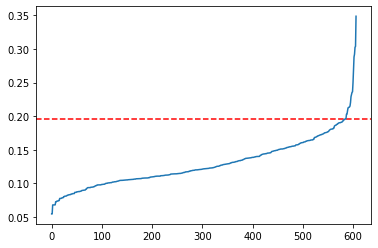

In [105]:
nbrs = NearestNeighbors(n_neighbors=3).fit(X2)
distances, indices = nbrs.kneighbors(X2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.196, color='r', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.plot(distances)

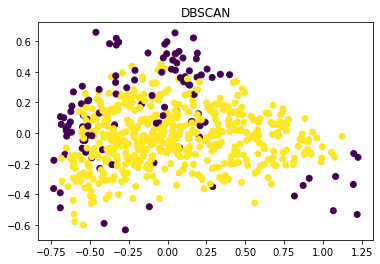

(array([-1,  0], dtype=int64), array([110, 497], dtype=int64))

In [118]:
mpts = len(X2.columns)-8
eps = 0.196

dbscan = DBSCAN(eps=eps, min_samples=mpts).fit(X2)

plt.scatter(red_X2[:, 0], red_X2[:, 1], c=dbscan.labels_)
plt.title("DBSCAN")
plt.show()

np.unique(dbscan.labels_, return_counts=True)

Probando distintos valores de min_pts, sólo se obtiene un cluster más outliers. 

### Agglomerative

In [120]:
complete = linkage(X2, method="complete")
single = linkage(X2, method="single")
average = linkage(X2, method="average")
ward = linkage(X2, method="ward")

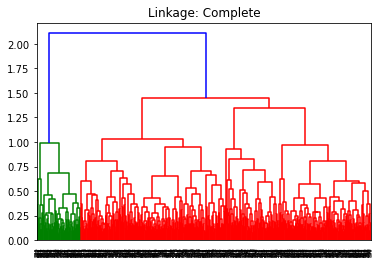

In [121]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

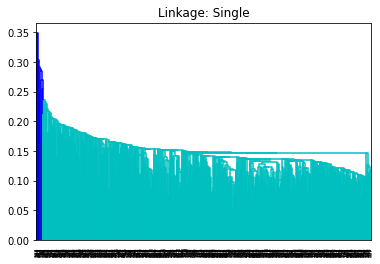

In [122]:
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

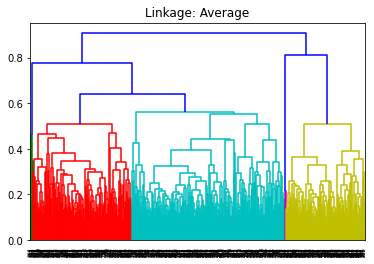

In [123]:
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

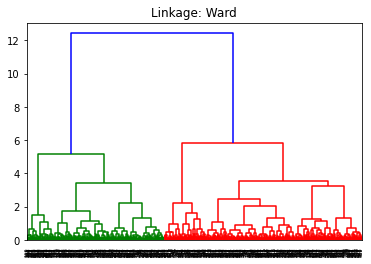

In [124]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

In [9]:
ward_2_1 = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=6).fit(X2)
average_2_1 = AgglomerativeClustering(n_clusters=None, linkage="average", distance_threshold=0.6).fit(X2)
complete_2_1 = AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=1.55).fit(X2)

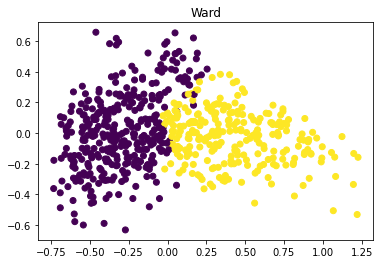

In [12]:
plt.scatter(red_X2[:, 0], red_X2[:, 1], c=ward_2_1.labels_)
plt.title("Ward")
plt.show()

In [15]:
c_sim(clus_dt, ward_2_1)
print()
meanRating(clus_dt, ward_2_1)
print()
print("Categories mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["Category"])))
print("Genres mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["Genres"])))
print("Content Rating mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["Content.Rating"])))
print("Rating mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["Rating_Q"])))
print("Installs mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["Installs_Q"])))
print("Sentiment polarity mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["sentiment_polarity"])))
print("Sentiment subjectivity mutual info :", mutual_info_score(ward_2_1.labels_, np.ravel(clus_dt["sentiment_subjectivity"])))

Cluster 0
categories: 0.6363636363636364
top category: 11 | 0.10505836575875487
genres: 0.31746031746031744
top genre: 109 | 0.102803738317757
content ratings: 1.0
top content rating: Everyone | 0.840782122905028
---------------------------------------
Cluster 1
categories: 0.45454545454545453
top category: 14 | 0.2822085889570552
genres: 0.2222222222222222
top genre: 59 | 0.1651376146788991
content ratings: 0.8
top content rating: Everyone | 0.7309236947791165
---------------------------------------

Cluster 0 mean rating: 4.274022346368715
Cluster 1 mean rating: 4.283132530120482

Categories mutual info : 0.0586511861941221
Genres mutual info : 0.09945114868003624
Content Rating mutual info : 0.012389536823538584
Rating mutual info : 0.004619896350233965
Installs mutual info : 0.028880037675597242
Sentiment polarity mutual info : 0.024202155514034204
Sentiment subjectivity mutual info : 0.03673644789660346


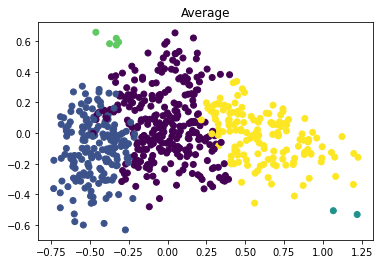

In [130]:
plt.scatter(red_X2[:, 0], red_X2[:, 1], c=average_2_1.labels_)
plt.title("Average")
plt.show()

In [16]:
c_sim(clus_dt, average_2_1)
print()
meanRating(clus_dt, average_2_1)
print()
print("Categories mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["Category"])))
print("Genres mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["Genres"])))
print("Content Rating mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["Content.Rating"])))
print("Rating mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["Rating_Q"])))
print("Installs mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["Installs_Q"])))
print("Sentiment polarity mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["sentiment_polarity"])))
print("Sentiment subjectivity mutual info :", mutual_info_score(average_2_1.labels_, np.ravel(clus_dt["sentiment_subjectivity"])))

Cluster 0
categories: 0.5151515151515151
top category: 14 | 0.13513513513513514
genres: 0.23809523809523808
top genre: 61 | 0.1450381679389313
content ratings: 0.8
top content rating: Everyone | 0.8158844765342961
---------------------------------------
Cluster 1
categories: 0.3939393939393939
top category: 23 | 0.16842105263157894
genres: 0.20634920634920634
top genre: 79 | 0.16842105263157894
content ratings: 1.0
top content rating: Everyone | 0.85
---------------------------------------
Cluster 2
categories: 0.030303030303030304
top category: 25 | 1.0
genres: 0.015873015873015872
top genre: 81 | 1.0
content ratings: 0.2
top content rating: Teen | 1.0
---------------------------------------
Cluster 3
categories: 0.06060606060606061
top category: 11 | 0.6666666666666666
genres: 0.015873015873015872
top genre: 94 | 1.0
content ratings: 0.4
top content rating: Everyone | 0.8
---------------------------------------
Cluster 4
categories: 0.30303030303030304
top category: 14 | 0.4772727272

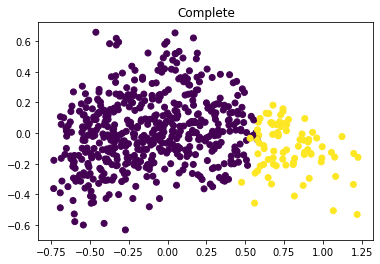

In [17]:
plt.scatter(red_X2[:, 0], red_X2[:, 1], c=complete_2_1.labels_)
plt.title("Complete")
plt.show()

In [19]:
c_sim(clus_dt, complete_2_1)
print()
meanRating(clus_dt, complete_2_1)
print()
print("Categories mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["Category"])))
print("Genres mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["Genres"])))
print("Content Rating mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["Content.Rating"])))
print("Rating mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["Rating_Q"])))
print("Installs mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["Installs_Q"])))
print("Sentiment polarity mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["sentiment_polarity"])))
print("Sentiment subjectivity mutual info :", mutual_info_score(complete_2_1.labels_, np.ravel(clus_dt["sentiment_subjectivity"])))

Cluster 0
categories: 0.6363636363636364
top category: 14 | 0.13119533527696792
genres: 0.31746031746031744
top genre: 109 | 0.11654135338345864
content ratings: 1.0
top content rating: Everyone | 0.8140417457305503
---------------------------------------
Cluster 1
categories: 0.21212121212121213
top category: 14 | 0.5531914893617021
genres: 0.09523809523809523
top genre: 59 | 0.2857142857142857
content ratings: 0.8
top content rating: Everyone | 0.675
---------------------------------------

Cluster 0 mean rating: 4.27134724857685
Cluster 1 mean rating: 4.32

Categories mutual info : 0.06595635218576625
Genres mutual info : 0.09105407113245402
Content Rating mutual info : 0.010410196769614348
Rating mutual info : 0.007127081168061072
Installs mutual info : 0.024337938702237424
Sentiment polarity mutual info : 0.008909847461856043
Sentiment subjectivity mutual info : 0.020173565416982106
